### EQUIPO: 12

### GRUPO: 002

### FRECUENCIA: MIÉRCOLES DE 7-10 PM

### INTEGRANTES:

### Sifuentes Soto Aranza

### Contreras Garcia Gabriel Adrian

### Valeria Solis Agundis

# Base de datos: US Accidents (3.5 million records)
## Descripcion de los datos:
Nuestro conjunto de datos recopila información sobre accidentes automovilísticos en Estados
Unidos, donde cubre 49 estados. Los datos de accidentes se recopilan desde febrero de
2016 hasta junio de 2020 , utilizando dos API que proporcionan datos de incidentes (o
eventos) de tráfico en tiempo real. Estas API transmiten datos de tráfico capturados por una
variedad de entidades, como los departamentos de transporte de los Estados Unidos y el
estado, agencias de aplicación de la ley, cámaras de tráfico y sensores de tráfico dentro de
las redes de carreteras. Actualmente, hay alrededor de 3,5 millones de registros de
accidentes en este conjunto de datos.
Los datos recopilados van desde las condiciones del clima en el que se desarrolló el
accidente, hasta la hora, fecha en que se llevó a cabo, teniendo datos históricos en nuestra
base de datos.

A continuacion les damos una vista previa de nuestra base de datos

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.shape

(3513617, 49)

Nuestra base de datos consta de **49** columnas, y cuenta con **3513617** registros de accidentes a lo largo de 4 años y medio, empieza el registro desde el 2016 al 2020, en cada registro se almacena un accidente diferente junto con la informacion detallada del suceso.

Los nombres de cada columna se enlistan debajo:

In [6]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')



Cada columna almacena informacion relevante del suceso, debajo les mostramos una breve descripcion de cada una de ellas:

1. Se registra un identificador único del registro de accidentes.
2. Se indica la fuente del informe del accidente (es decir, la API que informó el accidente).
3. Un accidente de tráfico puede tener un código de canal de mensajes de tráfico (TMC) que proporciona una descripción más detallada del evento, muestra el código.
4. Muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, un retraso corto como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, un retraso largo).
5. Muestra la hora de inicio del accidente en la zona horaria local.
6. Muestra la hora final del accidente en la zona horaria local. La hora final aquí se refiere a cuando el impacto del accidente en el flujo de tráfico fue descartado.
7. Muestra la latitud en coordenadas GPS del punto de inicio.
8. Muestra la longitud en coordenadas GPS del punto de inicio.
9. Muestra la latitud en coordenadas GPS del punto final.
10. Muestra la longitud en coordenadas GPS del punto final.
11. La longitud de la extensión de la carretera afectada por el accidente en millas.
12. Muestra una descripción del accidente.
13. Muestra el número de la calle en el registro de dirección.
14. Muestra el nombre de la calle en el registro de direcciones.
15. Muestra el lado relativo de la calle (derecha / izquierda) en el registro de direcciones. Registrando solo R(derecha), L(izquierda) así sea el caso.
16. Muestra la ciudad en el registro de direcciones.
17. Muestra el condado en el registro de direcciones.
18. Muestra el estado en el registro de direcciones.
19. Muestra el código postal en el registro de direcciones.
20. Muestra el país en el registro de direcciones.
21. Muestra la zona horaria según la ubicación del accidente (este, centro, etc.).
22. Denota el aeropuerto que está más cerca de donde ocurrió el accidente.
23. Muestra la marca de tiempo del registro de observación meteorológica (en hora local).
24. Muestra la temperatura (en Fahrenheit).
25. Muestra la sensación térmica (en grados Fahrenheit).
26. Muestra la humedad (en porcentaje).
27. Muestra la presión del aire (en pulgadas).
28. Muestra visibilidad (en millas).
29. Muestra la dirección del viento.
30. Muestra la velocidad del viento (en millas por hora).
31. Muestra la cantidad de precipitación en pulgadas, si hay alguna.
32. Muestra las condiciones meteorológicas (lluvia, nieve, tormenta, niebla, etc.)
33. Una anotación de POI que indica la presencia de comodidades en un lugar cercano, donde se registra verdadero o falso según corresponda.
34. Una anotación de POI que indica la presencia de un tope o una joroba en una ubicación cercana, donde se registra verdadero o falso según corresponda.
35. Una anotación de POI que indica la presencia de cruce en una ubicación cercana, donde se registra verdadero o falso según corresponda.
36. Una anotación de POI que indica la presencia de una señal de dar el paso en una ubicación cercana, donde se registra verdadero o falso según corresponda.
37. Una anotación de POI que indica la presencia de una intersección en una ubicación cercana, donde se registra verdadero o falso según corresponda.
38. Una anotación de POI que indica la presencia de una señal de no salida en una ubicación cercana, donde se registra verdadero o falso según corresponda.
39. Una anotación de POI que indica la presencia de vías férreas en una ubicación cercana, donde se registra verdadero o falso según corresponda.
40. Una anotación de POI que indica la presencia de una rotonda en una ubicación cercana, donde se registra verdadero o falso según corresponda.
41. Una anotación de POI que indica la presencia de una estación en una ubicación cercana, donde se registra verdadero o falso según corresponda.
42. Una anotación de POI que indica la presencia de una parada en una ubicación cercana, donde se registra verdadero o falso según corresponda.
43. Una anotación de POI que indica la presencia de traffic_calming en una ubicación cercana, donde se registra verdadero o falso según corresponda.
44. Una anotación de POI que indica la presencia de una señal de tráfico en una ubicación cercana, donde se registra verdadero o falso según corresponda.
45. Una anotación de POI que indica la presencia de Turn_loop (Un circuito de giro es un segmento de carretera a menudo circular al final de un camino que se utiliza para dar la vuelta) en una ubicación cercana, donde se registra verdadero o falso según corresponda.
46. Muestra el período del día (es decir, día o noche) basado en el amanecer / atardecer.
47. Muestra el período del día (es decir, día o noche) basado en el crepúsculo civil.
48. Muestra el período del día (es decir, día o noche) según el crepúsculo náutico.
49. Muestra el período del día (es decir, día o noche) según el crepúsculo astronómico.

In [10]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,ID,object
1,Source,object
2,TMC,float64
3,Severity,int64
4,Start_Time,object
5,End_Time,object
6,Start_Lat,float64
7,Start_Lng,float64
8,End_Lat,float64
9,End_Lng,float64


Cada una de las columnas contiene un tipo de dato especifico, contamos con columnas con datos enteros, flotantes, con datos booleanos y por ultimo con datos tipo string pero estos ultimos la funcion dtypes nos los muestra como tipo de dato object

In [11]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,13
1,int64,1
2,float64,14
3,object,21


## Justificación del uso de datos:
Usamos esta base de datos ya que, creemos que es una base de datos muy completa, la cual
contiene diversas variables que pueden resultar útiles para resolver diferentes problemáticas 
que sean de nuestro interes abordar; Además que contiene un registro de tiempo muy
extenso, por lo que será más sencillo tener resultados favorecedores según la problemática
que se plantee. Nos llama la atencion que presentan datos climaticos y geograficos del accidente, estos dos puntos creemos pueden ser claves a la hora de intentar resolver alguna problematica, estas dos categorias son nuestra base para poder determinar una solucion a la problematica planteada.


Nos decidimos por esta base ya que creemos que contiene informacion muy importante que podria ser usada para mejorar la calidad de vida de las personas, si logramos implementar una mejora para poder actuar de una forma mas rapida ante estos accidentes, se podrian salvar muchas vidas, esto traeria grandes beneficios a la sociedad, los elementos de la policia podrian llegar de una manera mas rapida a atender estos sucesos.

## Objetivos
- El objetivo principal de este trabajo es realizar un modelo de predicción, necesitamos poder predecir cuándo sucederá un accidente y en donde, para poder ubicar a más policías dentro de estas zonas, tomaremos en cuenta diversos factores que son relevantes a la hora de que sucede un choque como lo pueden ser: ciudad, estado, temperatura, humedad, condición del clima (nublado, soleado, lluvioso, etc.) y periodo del día (día o noche). Estos factores serán analizados en conjunto para predecir una probabilidad de accidente, de esta forma se podría monitorear todos los estados de EU las 24 horas, y dependiendo de los datos que nos vaya arrojando el modelo se podría enviar más patrullas a los lugares con mayor probabilidad de que suceda un choque, así podría atendedores más rápido un accidente automovilístico y se podrían salvar más vidas.


- Como objetivo secundario queremos analizar en donde se producen más accidentes automovilísticos y cuál es su severidad(el impacto que tienen estos choques en el tráfico), al contar con coordenadas exactas de longitud y latitud podemos realizar una segmentación y ver donde es más frecuente que ocurran los choques y saber cuánto impactan estos choques en el trafico, se toma a medida de 1 – 4 donde 1 es un ligero retraso en el tráfico y 4 un gran retraso en el tráfico (en cuestión de horas). Esto nos podría ayudar a los cálculos del modelo predictivo, pero además podría usarse para otros ámbitos como en el área de los seguros para ver en qué zonas suceden con mayor frecuencia accidentes y con esto realizar mejores cálculos para las primas de los seguros de autos. 

# Desarrollo de las herramientas

## - Limpieza de los datos

In [4]:
import pandas as pd
import numpy as np

Antes de comenzar debemos de importar las librerias que usaremos para esta primera parte de la limpieza de los datos.

In [28]:
df = pd.read_csv("US_Accidents_June20.csv",encoding='utf8')

Luego de ello, pasamos a leer nuestra base de datos y la guardamos en nuestra variable: **df**

Para darles una primera impresion de nuestra base de datos utilizamos la siguiente funcion:

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


El primer paso en nuestra limpieza de los datos sera el eliminar columnas no deseadas, para ello les mencionamos debajo que columna vamos a eliminar y una breve explicacion de porque decidimos quitarla.

- ID: esta columna la eliminaremos porque no necesitamos identificar los accidentes, simplemente podemos tomarlos como datos enumerados, sin un codigo especifico
- Source: esta columna la eliminaremos porque no estamos interesados en tomar en cuenta de que fuente provienen los datos
- TMC: esta columna la eliminaremos porque el codigo que muestra no nos da mucha informacion por si solo, necesitariamos una columna con la descripcion del codigo en dado caso que quisieramos utilizarlo
- End_Lat: esta columna la eliminaremos porque no contiene informacion, no hay registros en esta columna
- End_Lng: esta columna la eliminaremos porque no contiene informacion, no hay registros en esta columna
- Description: esta columna la eliminaremos porque no tenemos una lista con descripciones, cada una se relata de forma diferente
- Country: esta columna la eliminaremos porque solo estamos viendo Estados Unidos, tenemos un solo dato 
- Airport_Code: esta columna la eliminaremos porque no nos brinda informacion relevante para nuestro estudio
- Weather_Timestamp: esta columna la eliminaremos porque no nos es util el saber la hora en que se tomo la medicion del clima
- Wind_Chill(F): esta columna la eliminaremos porque solo utilizaremos la temperatura, la sensacion termica no la necesitamos
- Wind_Direction: esta columna la eliminaremos porque no es importante para nuestros calculos la direccion del aire
- Wind_Speed(mph): esta columna la eliminaremos porque no estamos interesados en utilizar la velocidad del viento como una variable de interes, se excluye para nuestros calculos 
- Amenity: esta columna la eliminaremos porque la variable como tal no nos es relevante, no nos aporta para nuestro trabajo
- Bump: esta columna la eliminaremos porque la variable no tiene datos representativos, solo tenemos false en las filas 
- Give_Way: esta columna la eliminaremos porque la variable no tiene datos representativos, solo tenemos false en las filas
- No_Exit: esta columna la eliminaremos porque la variable no tiene datos representativos, solo tenemos false en las filas
- Roundabout: esta columna la eliminaremos porque la variable no tiene datos representativos, solo tenemos false en las filas
- Railway: esta columna la eliminaremos porque no creemos que sea de mucha utilidad para las comparaciones que haremos
- Traffic_Calming: esta columna la eliminaremos porque no nos brinda mucha informacion relevante del suceso
- Turning_Loop: esta columna la eliminaremos porque la mayoria son datos nulos, no es una muestra representativa para nuestros calculos
- Civil_Twilight: esta columna la eliminaremos porque para nuestro estudio nos basaremos en el amanecer y atardecer 
- Nautical_Twilight: esta columna la eliminaremos porque para nuestro estudio nos basaremos en el amanecer y atardecer
- Astronomical_Twilight: esta columna la eliminaremos porque para nuestro estudio nos basaremos en el amanecer y atardecer

In [29]:
df.drop('ID',axis = 1, inplace = True)
df.drop('Source',axis = 1, inplace = True)
df.drop('TMC',axis = 1, inplace = True)
df.drop('End_Lat',axis = 1, inplace = True)
df.drop('End_Lng',axis = 1, inplace = True)
df.drop('Description',axis = 1, inplace = True)
df.drop('Country',axis = 1, inplace = True)
df.drop('Airport_Code',axis = 1, inplace = True)
df.drop('Weather_Timestamp',axis = 1, inplace = True)
df.drop('Wind_Chill(F)',axis = 1, inplace = True)
df.drop('Wind_Direction',axis = 1, inplace = True)
df.drop('Wind_Speed(mph)',axis = 1, inplace = True)
df.drop('Amenity',axis = 1, inplace = True)
df.drop('Bump',axis = 1, inplace = True)
df.drop('Give_Way',axis = 1, inplace = True)
df.drop('No_Exit',axis = 1, inplace = True)
df.drop('Roundabout',axis = 1, inplace = True)
df.drop('Railway',axis = 1, inplace = True)
df.drop('Traffic_Calming',axis = 1, inplace = True)
df.drop('Turning_Loop',axis = 1, inplace = True)
df.drop('Civil_Twilight',axis = 1, inplace = True)
df.drop('Nautical_Twilight',axis = 1, inplace = True)
df.drop('Astronomical_Twilight',axis = 1, inplace = True)

In [30]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')

Ahora vamos hacer un cambio en las columnas de Start_Time y End_Time para poder sacar de ahi los años, meses, horas y dia de la semana de cada accidente, esto nos dara una vision mas clara de la informacion

In [31]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60

In [32]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Number,Street,Side,City,...,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Month,Year,Hour,Weekday,Duration
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,NaN,I-70 E,R,Dayton,...,False,False,False,False,Night,2,2016,5,0,314.0
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,2584.0,Brice Rd,L,Reynoldsburg,...,False,False,False,False,Night,2,2016,6,0,30.0
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,NaN,State Route 32,R,Williamsburg,...,False,False,False,True,Night,2,2016,6,0,30.0
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,NaN,I-75 S,R,Dayton,...,False,False,False,False,Night,2,2016,7,0,30.0
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,NaN,Miamisburg Centerville Rd,R,Dayton,...,False,False,False,True,Day,2,2016,7,0,30.0


Ahora vamos a quitar los duplicados de la tabla y ademas dejar solo los valores que tienen una duracion entre 0 y una semana 

In [33]:
oneweek = 60*24*7
df = df[(df['Duration']>0) & (df['Duration']< oneweek)].drop_duplicates(subset=['Start_Time','End_Time','City','Street','Number'])

Como ahora tenemos el año, mes, dia, etc. Las columnas de Start_Time y End_Time ya no las necesitamos asi que las quitamos

In [34]:
df.drop(['Start_Time','End_Time'],axis = 1, inplace = True)

In [35]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Number,Street,Side,City,County,State,...,Junction,Station,Stop,Traffic_Signal,Sunrise_Sunset,Month,Year,Hour,Weekday,Duration
0,3,39.865147,-84.058723,0.01,NaN,I-70 E,R,Dayton,Montgomery,OH,...,False,False,False,False,Night,2,2016,5,0,314.0
1,2,39.928059,-82.831184,0.01,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,...,False,False,False,False,Night,2,2016,6,0,30.0
2,2,39.063148,-84.032608,0.01,NaN,State Route 32,R,Williamsburg,Clermont,OH,...,False,False,False,True,Night,2,2016,6,0,30.0
3,3,39.747753,-84.205582,0.01,NaN,I-75 S,R,Dayton,Montgomery,OH,...,False,False,False,False,Night,2,2016,7,0,30.0
4,2,39.627781,-84.188354,0.01,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,...,False,False,False,True,Day,2,2016,7,0,30.0


El siguiente paso en la limpieza es verificar los datos nulos, primero veremos en que columnas tenemos datos nulos

In [36]:
df.isnull().any()

Severity             False
Start_Lat            False
Start_Lng            False
Distance(mi)         False
Number                True
Street               False
Side                 False
City                  True
County               False
State                False
Zipcode               True
Timezone              True
Temperature(F)        True
Humidity(%)           True
Pressure(in)          True
Visibility(mi)        True
Precipitation(in)     True
Weather_Condition     True
Crossing             False
Junction             False
Station              False
Stop                 False
Traffic_Signal       False
Sunrise_Sunset        True
Month                False
Year                 False
Hour                 False
Weekday              False
Duration             False
dtype: bool

Ahora contaremos los datos nulos por columna

In [37]:
df.isnull().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Number               2237505
Street                     0
Side                       0
City                     110
County                     0
State                      0
Zipcode                  978
Timezone                3771
Temperature(F)         64741
Humidity(%)            68647
Pressure(in)           54990
Visibility(mi)         74569
Precipitation(in)    2008435
Weather_Condition      74777
Crossing                   0
Junction                   0
Station                    0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset           113
Month                      0
Year                       0
Hour                       0
Weekday                    0
Duration                   0
dtype: int64

Como podemos apreciar la columna **Number** cuenta con una gran cantidad de datos nulos, esto es porque algunas calles o avenidas no tienen un numero fijo por lo cual este valor no existe, esta columna podemos eliminarla ya que no nos es de mucha ayuda, no la necesitamos, al igual que **Precipitation(in)**, en este caso cuando no hay precipitacion se queda con valor nulo, y como vemos la mayoria de los accidentes no cuentan con un valor en esta columna por lo que decidimos no tomarla como parte de nuestro estudio

In [38]:
df.drop(['Number','Precipitation(in)'],axis = 1, inplace = True)

Las demas columnas elegimos dejarlas solo que quitaremos los datos nulos de ellas, hacemos esto ya que los datos nulos de las columnas no representan ni el 1% del total de los datos asi que no estaremos alterando mucho nuestra informacion

In [39]:
df = df.dropna()

Ahora, con la base de datos limpia nos quedan en total:

In [40]:
df.shape

(3370919, 27)

In [44]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition',
       'Crossing', 'Junction', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset', 'Month', 'Year', 'Hour', 'Weekday', 'Duration'],
      dtype='object')

Lo ultimo que hay que hacer es cambiarle el nombre de las columnas ya que estas se encuentran en ingles y preferimos cambiarlas al español

In [45]:

df.rename(columns = {'Severity':'Severidad'}, inplace = True)
df.rename(columns = {'Start_Lat':'Latitud'}, inplace = True)
df.rename(columns = {'Start_Lng':'Longitud'}, inplace = True)
df.rename(columns = {'Distance(mi)':'Distancia_mi'}, inplace = True)
df.rename(columns = {'Street':'Calle'}, inplace = True)
df.rename(columns = {'Side':'Lado_de_la_via'}, inplace = True)
df.rename(columns = {'City':'Ciudad'}, inplace = True)
df.rename(columns = {'County':'Condado'}, inplace = True)
df.rename(columns = {'State':'Estado'}, inplace = True)
df.rename(columns = {'Zipcode':'Codigo_postal'}, inplace = True)
df.rename(columns = {'Timezone':'Zona_Horaria'}, inplace = True)
df.rename(columns = {'Temperature(F)':'Temperatura_F'}, inplace = True)
df.rename(columns = {'Humidity(%)':'Humedad_Porcentual'}, inplace = True)
df.rename(columns = {'Pressure(in)':'Presion_in'}, inplace = True)
df.rename(columns = {'Visibility(mi)':'Visibilidad_mi'}, inplace = True)
df.rename(columns = {'Weather_Condition':'Condicion_Climatica'}, inplace = True)
df.rename(columns = {'Crossing':'Cruce'}, inplace = True)
df.rename(columns = {'Junction':'Interseccion'}, inplace = True)
df.rename(columns = {'Station':'Estacion'}, inplace = True)
df.rename(columns = {'Stop':'Paro'}, inplace = True)
df.rename(columns = {'Traffic_Signal':'Señal_de_trafico'}, inplace = True)
df.rename(columns = {'Sunrise_Sunset':'Dia/Noche'}, inplace = True)
df.rename(columns = {'Month':'Mes'}, inplace = True)
df.rename(columns = {'Year':'Año'}, inplace = True)
df.rename(columns = {'Hour':'Hora'}, inplace = True)
df.rename(columns = {'Weekday':'Dia_de_la_semana'}, inplace = True)
df.rename(columns = {'Duration':'Duracion'}, inplace = True)

Ahora exportamos nuestra base de datos a un archivo .csv

In [47]:
df.to_csv('Datos_limpios.csv', index=False)

## - Estadistica basica de los datos

Datos limpios

In [6]:
vd = pd.read_csv("Datos_limpios.csv",encoding='utf8')

+ **Promedio de minutos que dura el accidente**

In [3]:
vd['Duracion'].mean()

88.92946948085446

En promedio, un accidente de auto dura 88.92 minutos, esto hace referencia al tiempo que la vialidad tarda en ser despejada, lo cual es mayor de una hora, nosotros buscariamos que esta cifra bajara al poder tener una mejor proyección de donde se llevará a cabo un accidente, los policias podrian llegar al lugar de una manera mas oportuna y asi atender el accidente y abrir la vialidad

In [4]:
vd['Duracion'].var()

17541.214831586803

Nosotros tenemos una varianza muy grande ya que los tiempos de los accidentes varian mucho desde 0 hasta 10000 minutos, por eso la varianza es grande, tenemos datos muy dispersos

In [7]:
vd['Duracion'].std()

132.4432513629396

Como podemos apreciar tambien la desviacion estandar es grande, 132 minutos en total, nosotros buscariamos reducir el valor de la desviacion al generar pronosticos de donde sucederan accidentes, para que estos puedan atenderse mas rapido

In [9]:
vd['Duracion'].max()

10075.766666666666

Este valor nos dice el tiempo aproximado maximo en que se despejo la vialidad luego de un accidente, este valor representa que la vialidad estuvo cerrada casi por 6 dias enteros, es una cifra alarmante y lo que nos deja ver es que hay veces donde los accidentes superan por mucho lo que puedan hacer los policias por el fuerte impacto de los mismos, pudo suceder que en este accidente la vialidad quedo dañada y por eso no se pudo utilizar por ese numero de dias, parece ser un dato aislado y no tan representativo para la muestra

**Conclusion de los datos:** tenemos una media de 90 minutos, una hora y media de trafico parado por accidentes ocurridos en la vialidad, esto representa un gran problema, ya que estar 90 minutos sin poder moverte de tu carro, quiza te estas perdiendo algun evento importante, llegar al trabajo a tiempo, etc. Ademas de esto lo que se tarda la policia y a veces paramedicos en llegar al lugar del accidente y luego atender el llamado de auxilio es muy grande, nuestro objetivo es poder encontrar las zonas que tienen mas severidad y mas ocurrencia de accidentes y categorizarlas como riesgosas, despues encontrar las cualidades que tienen en comun los accidentes que pasan en estas zonas para poder hacer predicciones de cuando podria ocurrir un percance, esto nos va a permitir alertar a las autoridades con mas anticipacion y de esta manera esta cifra se veria reducida, estos datos nos dan mucha informacion con respecto a lo que se vive dia con dia actualmente, nosotros al resolver la problematica planteada buscariamos que esta cifra se redujera, trayendo asi un gran beneficio para la comunidad.

## - Visualizacion de los datos

In [11]:
vd.head()

,Severidad,Latitud,Longitud,Distancia_mi,Calle,Lado_de_la_via,Ciudad,Condado,Estado,Codigo_postal,...,Interseccion,Estacion,Paro,Señal_de_trafico,Dia/Noche,Mes,Año,Hora,Dia_de_la_semana,Duracion
0,3,39.865147,-84.058723,0.01,I-70 E,R,Dayton,Montgomery,OH,45424,...,False,False,False,False,Night,2,2016,5,0,314.0
1,2,39.928059,-82.831184,0.01,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,...,False,False,False,False,Night,2,2016,6,0,30.0
2,2,39.063148,-84.032608,0.01,State Route 32,R,Williamsburg,Clermont,OH,45176,...,False,False,False,True,Night,2,2016,6,0,30.0
3,3,39.747753,-84.205582,0.01,I-75 S,R,Dayton,Montgomery,OH,45417,...,False,False,False,False,Night,2,2016,7,0,30.0
4,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,...,False,False,False,True,Day,2,2016,7,0,30.0


In [5]:
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import re
import io
from scipy.stats import boxcox

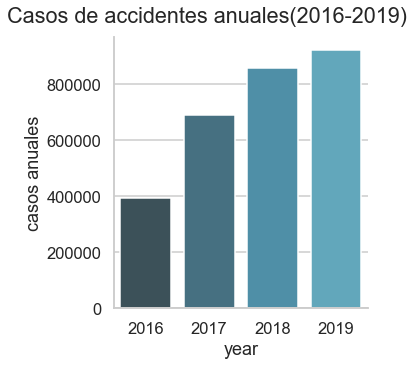

In [19]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('GnBu_d')
a = sns.catplot(x='Año',data=vd[vd['Año'] < 2020],kind='count')
a.fig.suptitle('Casos de accidentes anuales(2016-2019)',y=1.03)
a.set(ylabel='casos anuales',xlabel='year')
plt.show()

Como podemos apreciar en la grafica la cantidad de casos anuales presenta una tendencia alcista, aunque cada vez aumenta en menor medida el numero de casos reportados, al año 2019 se reportaron mas de 800,000 casos que se traduce a muchas vidas que salieron afectadas y otras que perdieron mucho tiempo en el trafico.

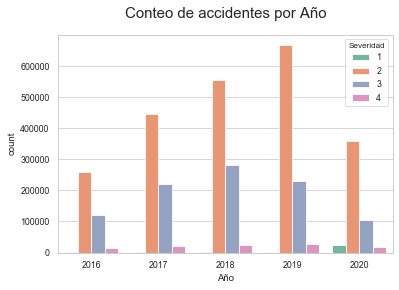

In [43]:
sns.countplot(x='Año', hue='Severidad', data=vd ,palette="Set2")
plt.title('Conteo de accidentes por Año', size=15, y=1.05)
plt.show()

Como podemos observar en esta grafica la mayor concentracion de accidentes en cada año son de severidad numero 2, esto se traduce a una severidad media, o que dicho de otras palabras el tiempo que tardo en despejarse la vialidad no deberia de haber sido mucho en la mayoria de los accidentes

In [78]:
vd_severidad = vd[['Severidad','Duracion']]
vd_severidad.groupby("Severidad").mean()

,Duracion
Severidad,
1,40.708179
2,92.152965
3,69.112096
4,215.125723


En esta tabla contamos con los promedios de tiempo para cada una de las severidades, como vemos va en aumento aunque en la severidad 3 tenemos una ligera caida, pero donde mas nos centraremos es en la severidad 2 que muestra una media de 92 minutos en despejarse la vialidad, muy acorde a la media que calculamos al inicio

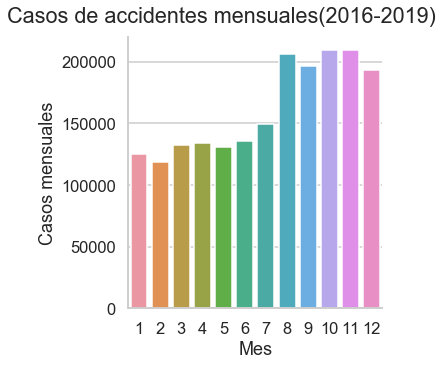

In [24]:
sns.set_context('talk')
m = sns.catplot(x='Mes',data=vd[vd['Año'] < 2019],kind='count')
m.fig.suptitle('Casos de accidentes mensuales(2016-2019)',y=1.03)
m.set(ylabel='Casos mensuales')
plt.show()

Lo que nos presenta esta grafica es que en los meses de agosto a diciembre es donde mas se registran casos de accidentes, en estas epocas se presenta un clima muy helado en la mayoria de las zonas de los Estados, por lo que podria darnos indicios de que la temperatura si es una variable relevante para nuestros calculos y hay que tomarla en cuenta

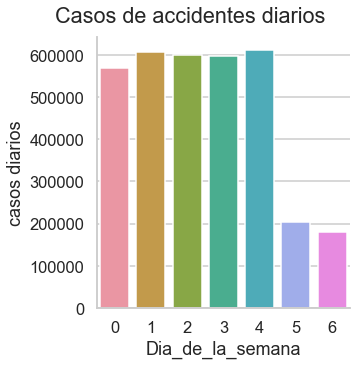

In [29]:
sns.set_context('talk')
w = sns.catplot(x='Dia_de_la_semana',data=vd,kind='count')
w.fig.suptitle('Casos de accidentes diarios',y=1.03)
w.set(ylabel='casos diarios')
plt.show()

Como era de esperarse los dias donde ocurren mas accidentes son entre semana empezando con el 0 como lunes hasta el 4 como viernes, justo los dias laborales es cuando mas se presentan accidentes, esto es malo ya que se pierde mucho tiempo en el trafico

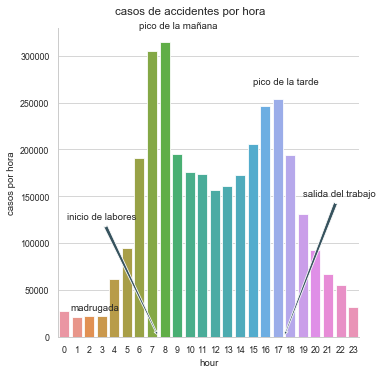

In [40]:
sns.set_context('paper')
h = sns.catplot(x='Hora',data=vd,kind='count')
h.fig.suptitle('casos de accidentes por hora',y=1.03)
h.set(ylabel='casos por hora',xlabel='hour')
plt.annotate('pico de la mañana',xy=(6,330000))
plt.annotate('pico de la tarde',xy=(15,270000))
plt.annotate('madrugada',xy=(0.5,28000))
plt.annotate('inicio de labores',xy=(7.5,0),xytext=(0.2,125000),arrowprops={'arrowstyle':'fancy'})
plt.annotate('salida del trabajo',xy=(17.5,0),xytext=(19,150000),arrowprops={'arrowstyle':'fancy'})
plt.show()

Para este caso continuando con lo anterior ahora nos centraremos en las horas donde ocurren estos accidentes, los picos los encontramos entre las 7-8 de la mañana y las 4-5 de la tarde que corresponderian a la hora donde comienzan los trabajadores a transladarse a sus trabajos y la hora en la que salen de laborar, estos puntos es donde ocurren las famosas "horas pico", que se ven aun mas afectadas cuando sucede algun accidente

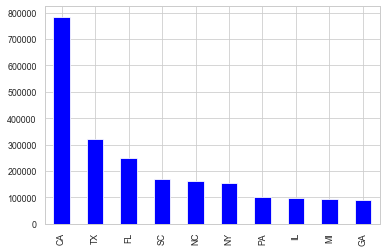

In [80]:
vd['Estado'].value_counts().head(10).plot.bar(color="blue")

Aqui quisimos ver ahora en donde se centran los accidentes, primero realizamos la siguiente grafica que nos muestra los estados donde se han reportado mas accidentes

In [ ]:
import plotly.graph_objects as go
state_count_acc = pd.value_counts(vd['Estado'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = '2016 - 2020 US Traffic Accident Dataset by State',
    geo_scope='usa',
)

fig.show()

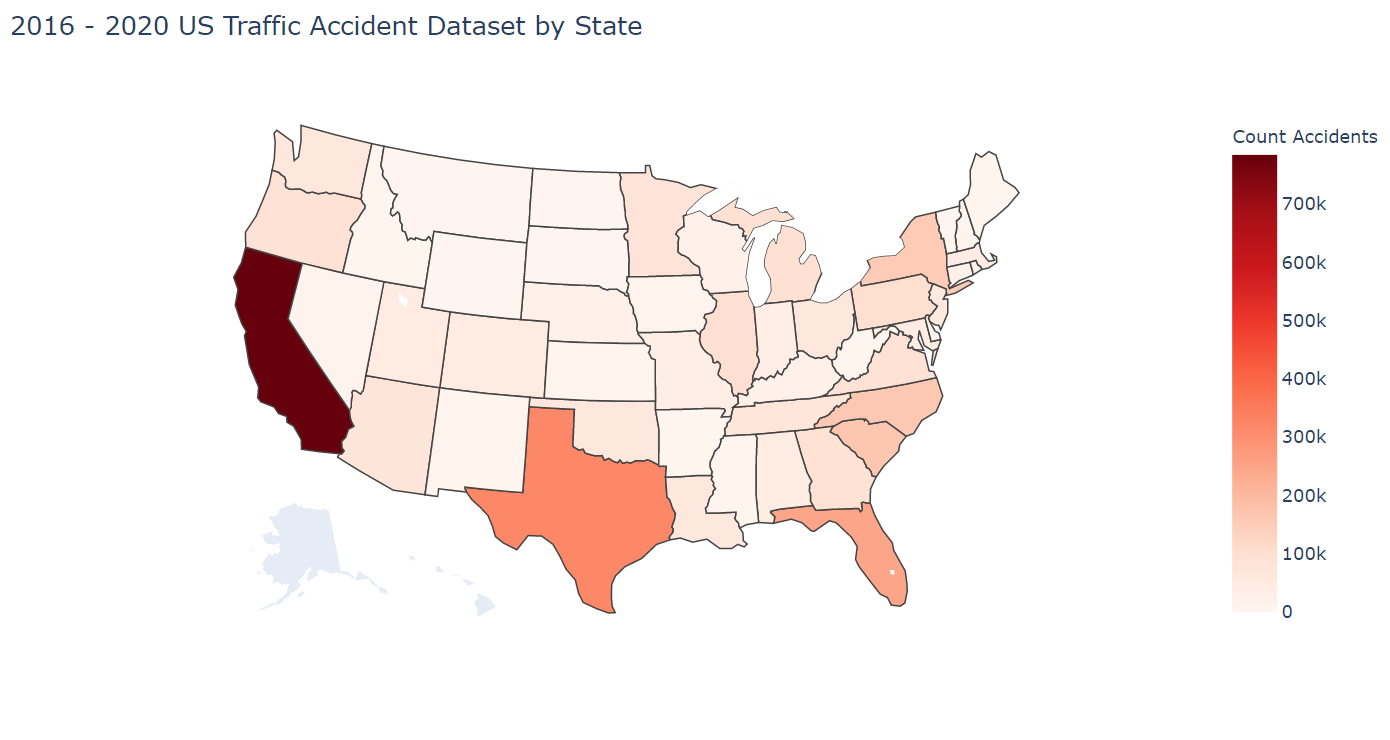

Ya teniendo una idea de las zonas con mas accidentes reportados ahora pasamos a visualizarlos en el mapa y de acuerdo a los valores las zonas mas oscuras es donde se presentaron mas accidentes, son las zonas con mas riesgo y probabilidad de ocurrir un accidente

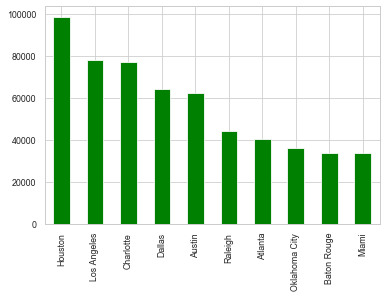

In [85]:
vd['Ciudad'].value_counts().head(10).plot.bar(color="green")

Para pasar a zonas mas especificas ahora graficamos las ciudades que reportan mas casos de accidentes, van de la mano con los Estados que ya vimos mas arriba

In [ ]:
data_sever = vd.sample(n=15000)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data_sever['Longitud'],
        lat = data_sever['Latitud'],
        text = data_sever['Ciudad'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Reds',
            cmin = data_sever['Severidad'].max(),
        color = data_sever['Severidad'],
        cmax = 1,
            colorbar_title="Severity"
        )))

fig.update_layout(
        title = 'Severity of accidents',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

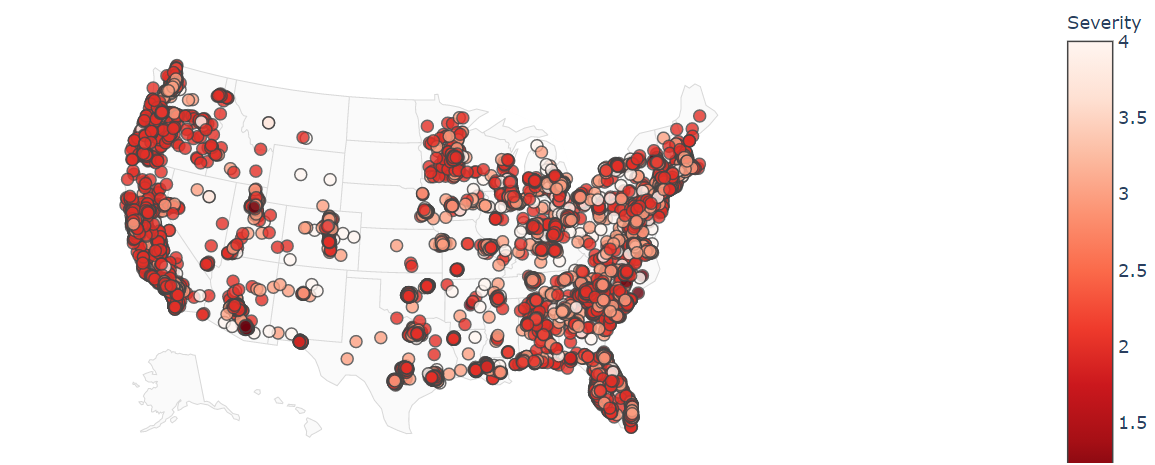

Ahora ya tenemos una mejor vision de los datos al poder localizar geograficamente los puntos en donde se presentaron los accidentes, ademas un plus es poder marcar la severidad de cada uno de los accidentes que como se puede apreciar es la severidad numero 2 la que mas se prepite

## Conclusiones

Después de estar manipulando toda nuestra base de datos, a través de la limpieza y la visualización, pudimos obtener grandes resultados que son de ayuda para nuestro objetivo principal, que es predecir cuando se va a producir un choque para diversas aplicaciones como dispersar mas policías en cierta zona que se prediga que tendrá un choque. Obtuvimos los lugares mas riesgosos por la severidad de los accidentes y el numero de ocurrencias. Nos falta comparar algunas variables como temperatura, humedad, presion, etc. 

Hasta el momento hemos logrado procesar la informacion para poder mostrar las zonas con mas severidad y mas cantidad de accidentes, estas zonas las denotaremos como zonas con mayor riesgo, las 3 que tomamos con mayor riesgo son [**California**,**Texas**,**Florida**], despues podemos hacer una segmentacion con zonas con un riesgo medio y riesgo bajo, esto para que sirva de apoyo para nuestro objetivo principal, con esto hemos cumplido en gran medida a nuestro objetivo secundario